In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

/Users/ilayda/Desktop/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [3]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [4]:
# Create dictionary of target classes
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

y = 3 (Dress)


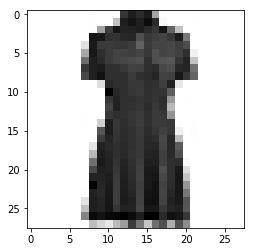

y = 7 (Sneaker)


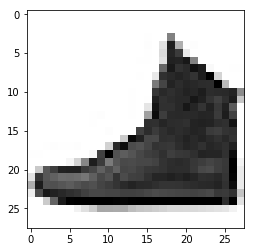

In [5]:
sample_1 = fashion_mnist.train.images[47].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(fashion_mnist.train.labels[47] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')
plt.show()

# Sample 2

# Get 28x28 image
sample_2 = fashion_mnist.train.images[23].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_2 = np.where(fashion_mnist.train.labels[23] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')
plt.show()

In [6]:
def var(name, shape, init=None, std=None):
    if init is None:
        if std is None:
            std = (2./shape[0])**0.5
        init = tf.truncated_normal_initializer(stddev=std)
    return tf.get_variable(name=name, shape=shape,
                                  dtype=tf.float32, initializer=init)




In [7]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(dtype=tf.float32, shape=[None, 28*28])
    Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])
    
    #hidden layer
    W1 = var('W1',[28*28, 100])
    b1 = var('b1',[100],tf.constant_initializer(0.1))
    out1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
    #output layer
    W2 = var('W2',[100,10])
    b2 = var('b2',[10],tf.constant_initializer(0.1))
    logits =tf.matmul(out1, W2) + b2
    
    #accuracy
    pred = tf.argmax(logits, axis=1)
    truth = tf.argmax(Y, axis=1)
    match = tf.cast(tf.equal(pred,truth), tf.float32)
    acc = tf.reduce_mean(match)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
    step = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [8]:
sess = tf.InteractiveSession(graph=g)
tf.global_variables_initializer().run()

In [9]:
bsize = 100
for I in range(10000):
    x,y = fashion_mnist.train.next_batch(bsize)
    _, acc_ = sess.run([step, acc], feed_dict={X:x, Y:y})
    print('%d) acc: %2.4f' % (I,acc_), end = '\r')

    

In [10]:
sess.run(acc, feed_dict={X:fashion_mnist.train.images, Y:fashion_mnist.train.labels})

0.9197636

In [11]:
sess.run(acc, feed_dict={X:fashion_mnist.test.images, Y:fashion_mnist.test.labels})

0.8791

In [12]:
loss_list = []
for i in range(1000):
    _,loss_ = sess.run([step, loss],feed_dict={X:x, Y:y})
    loss_list.append(loss_)
    if not i%100:
        print('%d) loss: %2.4f'  %(i, loss_))

0) loss: 0.2475
100) loss: 0.0086
200) loss: 0.0045
300) loss: 0.0031
400) loss: 0.0023
500) loss: 0.0018
600) loss: 0.0014
700) loss: 0.0012
800) loss: 0.0010
900) loss: 0.0009


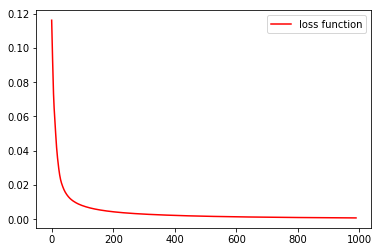

In [13]:
plt.plot(loss_list[10:1000],c='r')
plt.legend(['loss function'])
plt.show()